In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Sequential Data and Markov Models

In this chapter, we shift our focus from datasets where the observations are assumed to be **independent and identically distributed (i.i.d.)** to datasets that describe **sequential data**. The i.i.d. assumption allows us to express the likelihood function as the product of probabilities for each individual data point. However, sequential data often exhibits dependencies, where the value of a data point depends on its predecessors or follows some temporal or sequential structure. In this case, the i.i.d. assumption is no longer valid.

## Types of Sequential Data

Sequential data can arise in various contexts, including:

- **Time Series**: Examples include rainfall measurements on successive days, daily stock prices, or currency exchange rates.
- **Speech Data**: For example, the acoustic features of spoken words across successive time frames.
- **DNA Sequences**: The sequence of nucleotide base pairs along a strand of DNA.
- **Text**: The sequence of characters or words in a sentence or document.

An example of sequential data from **speech recognition** is shown in the spectrogram in **Figure 13.1**. In this spectrogram, the intensity of the spectral coefficients is plotted over time for the spoken words "Bayes' theorem". This is an example of **temporal sequential data**, where the observations are indexed by time.

## Stationary vs Nonstationary Sequential Data

We can distinguish between two types of sequential distributions:

- **Stationary Sequential Distributions**: The data evolves over time, but the underlying distribution remains the same. This implies that the statistical properties of the data do not change over time.
  
- **Nonstationary Sequential Distributions**: In this case, both the data and the underlying distribution evolve over time. Nonstationarity is often more complex and may require more sophisticated models.

In this chapter, we focus on the **stationary case**, where the distribution remains constant over time. This assumption simplifies the modeling process and allows us to focus on modeling the dependencies between sequential observations.

## Predicting Future Values in Time Series

In many applications, such as **financial forecasting**, we are interested in predicting future values in a time series based on the observed history. Intuitively, we expect that more recent observations are more relevant for predicting future values than older ones. This is particularly important in contexts like:

- **Stock Market Forecasting**: Where recent prices may be more informative about future movements than distant past prices.
- **Speech Recognition**: Where recent audio features are crucial for predicting the next phoneme or word.

However, considering all past observations to predict future ones can lead to models that are too complex and computationally expensive. As the number of observations grows, the complexity of the model increases without bound. 

## Markov Models for Sequential Data

To address the issue of complexity in modeling sequential data, we introduce **Markov models**. In a Markov model, we assume that the **future state** of the process depends only on the **current state**, and not on the sequence of events that preceded it. This is known as the **Markov assumption**.

Formally, a Markov model satisfies the following condition:

$$
P(X_t | X_{t-1}, X_{t-2}, \dots, X_0) = P(X_t | X_{t-1})
$$

where:
- $X_t$ represents the state of the system at time $t$,
- $P(X_t | X_{t-1})$ is the probability of transitioning to state $X_t$ given the previous state $X_{t-1}$,
- The past states $X_{t-2}, \dots, X_0$ do not influence the future state once $X_{t-1}$ is known.

This assumption dramatically reduces the complexity of the model, as it only requires modeling the transition probabilities between neighboring states, rather than considering all past observations.

## Example: Speech Data (Fig.1)

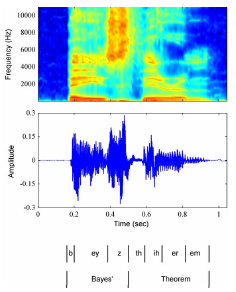

Fig.1 Example of a spectro- gram of the spoken words “Bayes’ theorem” showing a plot of the intensity of the spectral coefﬁcients versus time index.

The speech data example in **Fig.1** illustrates the sequential nature of the data, where each time frame (or window) contains features that are dependent on the previous time frame. This is an ideal case for modeling using sequential models such as **Hidden Markov Models (HMMs)**, which are commonly used in speech recognition tasks.

In the context of speech recognition, we typically aim to predict the next phoneme or word in the sequence, conditioned on the sequence of prior phonemes or words. Markov models provide a natural framework for this type of prediction.

## Summary

- **Sequential data** arises in many applications and often exhibits dependencies between observations.
- **Stationary sequential distributions** assume that the underlying distribution remains unchanged over time, simplifying the modeling process.
- **Markov models** offer a way to model sequential data by assuming that future observations depend only on the current observation, not the entire history.
- For more complex dependencies, **Hidden Markov Models (HMMs)** and other sequential models can be used to handle nonstationary data or to capture more intricate relationships between observations.

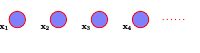

Fig.2 The simplest approach to modelling a sequence of observations is to treat them as independent, correspond- ing to a graph without links.

## Sequential Data and Markov Models: First-Order Markov Chain

In this section, we explore a more general framework for modeling sequential data using **state space models**. Sequential data often exhibits dependencies between observations, and the simplest way to handle this would be to treat the observations as **independent** (i.i.d.). However, such an approach does not capture the inherent sequential patterns in the data, such as correlations between adjacent observations.

## The Problem with i.i.d. Assumption

One of the simplest ways to model a sequence of observations is to treat them as independent, corresponding to a graph without any links between the observations, as shown in **Figure 13.2**. However, this approach fails to capture dependencies between observations, which are essential in many real-world scenarios. For example, in the case of **weather prediction**, we might observe whether it rained or not on each day in a sequence. If we treat this data as i.i.d., the only information we would have for predicting tomorrow's weather would be the relative frequency of rainy days in the past. However, we know that weather often exhibits trends that last for several days, so the weather on one day provides important information for predicting the next day's weather.

To capture such sequential patterns in the data, we need to relax the i.i.d. assumption. One way to do this is by using **Markov models**.

## First-Order Markov Chain

A **Markov model** is a probabilistic model that assumes that the future state of a system depends only on the current state, not on the sequence of events that preceded it. This is known as the **Markov assumption**.

Mathematically, for a sequence of observations $ x_1, x_2, \dots, x_N $, the joint probability of the entire sequence can be written as:

$$
p(x_1, x_2, \dots, x_N) = \prod_{n=1}^{N} p(x_n | x_1, x_2, \dots, x_{n-1})
$$

Now, if we assume that each conditional distribution $ p(x_n | x_1, x_2, \dots, x_{n-1}) $ is independent of all previous observations except the most recent one, we obtain the **first-order Markov chain**:

$$
p(x_n | x_1, x_2, \dots, x_{n-1}) = p(x_n | x_{n-1})
$$

This assumption greatly simplifies the model and makes it more tractable. The **first-order Markov chain** is represented as a **directed acyclic graph** (DAG), where each node corresponds to an observation, and each directed edge corresponds to the conditional dependency between successive observations. This model is shown in **Figure 13.3**.

## Markov Models and Graphical Models

Markov models can be efficiently represented using **probabilistic graphical models**. In this case, the structure of the model is a **tree**, where each node represents a random variable (e.g., an observation), and the edges represent the conditional dependencies between these variables. This tree structure ensures that the model remains tractable, even as the sequence length grows.

In the first-order Markov chain, the conditional dependencies are limited to the most recent observation. This simplifies inference, which can be performed efficiently using algorithms such as the **sum-product algorithm**.

### Example: Weather Prediction

Consider a simple example where we are predicting whether it will rain tomorrow based on today's weather. In the **Markov model**, the probability of tomorrow's weather (e.g., rain or no rain) depends only on today's weather, not on any previous days. This assumption simplifies the prediction process, as we only need to know the current state (today's weather) to predict the next state (tomorrow's weather).

## Summary

- **i.i.d. models** assume independence between observations, which may fail to capture sequential patterns in data.
- A **Markov model** assumes that the future state depends only on the current state and not on the entire history.
- The **first-order Markov chain** is a simple probabilistic model that captures the dependency between adjacent observations.
- Markov models can be represented as **directed acyclic graphs (DAGs)** and can be efficiently computed using algorithms like the **sum-product algorithm**.



Generated Weather Sequence:
Day 1: No Rain
Day 2: No Rain
Day 3: No Rain
Day 4: No Rain
Day 5: Rain
Day 6: No Rain
Day 7: Rain
Day 8: Rain
Day 9: Rain
Day 10: No Rain


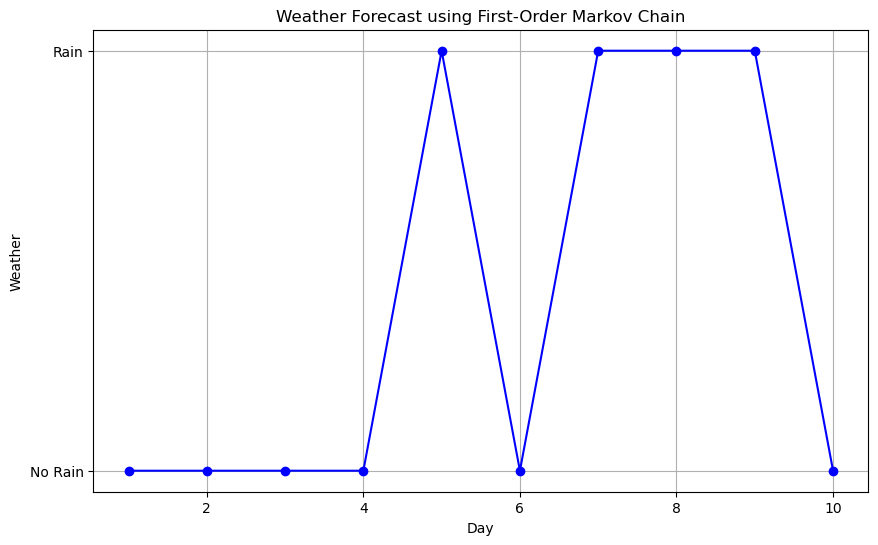

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states
states = ['Rain', 'No Rain']

# Transition matrix (P)
# Rows represent the current state, columns represent the next state.
# For example, P[0, 1] represents the probability of transitioning from 'Rain' to 'No Rain'.
P = np.array([[0.7, 0.3],  # Transition from 'Rain' to ('Rain', 'No Rain')
              [0.4, 0.6]])  # Transition from 'No Rain' to ('Rain', 'No Rain')

# Number of days (sequence length)
num_days = 10

# Function to simulate a sequence of weather conditions
def simulate_weather(num_days, P, states):
    # Randomly choose the initial state (for simplicity, start with 'Rain')
    current_state = np.random.choice(states)
    sequence = [current_state]
    
    for _ in range(num_days - 1):
        # Get the index of the current state
        state_idx = states.index(current_state)
        
        # Transition to the next state based on the transition probabilities
        next_state = np.random.choice(states, p=P[state_idx])
        sequence.append(next_state)
        
        # Update the current state
        current_state = next_state
    
    return sequence

# Simulate a sequence of weather conditions
weather_sequence = simulate_weather(num_days, P, states)

# Print the weather sequence
print("Generated Weather Sequence:")
for i, weather in enumerate(weather_sequence):
    print(f"Day {i+1}: {weather}")

# Plot the sequence
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_days + 1), [0 if state == 'No Rain' else 1 for state in weather_sequence], 'bo-', label='Weather Sequence')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Day')
plt.ylabel('Weather')
plt.title('Weather Forecast using First-Order Markov Chain')
plt.grid(True)
plt.show()


Generated Weather Sequence:
Day 1: No Rain
Day 2: No Rain
Day 3: No Rain
Day 4: No Rain
Day 5: Rain
Day 6: Rain
Day 7: Rain
Day 8: No Rain
Day 9: Rain
Day 10: Rain


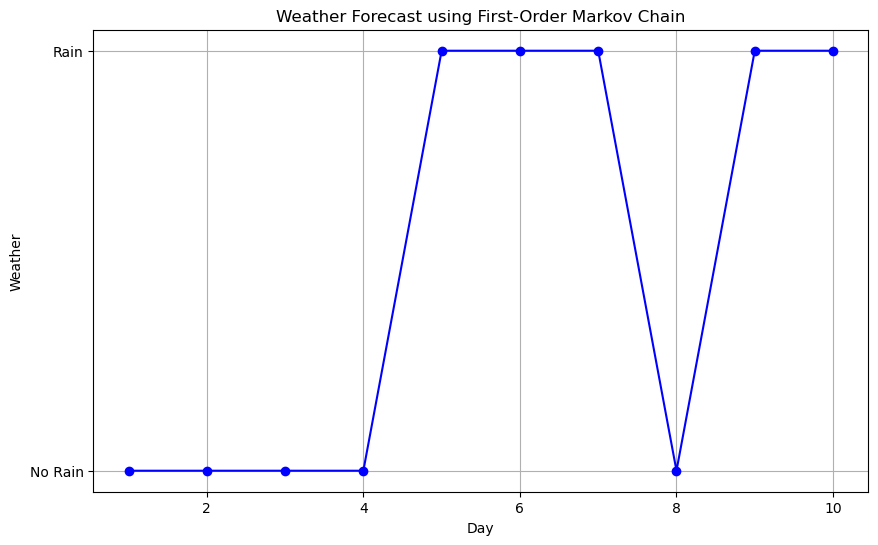

In [2]:
import random
import matplotlib.pyplot as plt

# Define the states
states = ['Rain', 'No Rain']

# Transition matrix (P)
# Rows represent the current state, columns represent the next state.
# P[0, 1] represents the probability of transitioning from 'Rain' to 'No Rain'.
P = [
    [0.7, 0.3],  # Transition from 'Rain' to ('Rain', 'No Rain')
    [0.4, 0.6]   # Transition from 'No Rain' to ('Rain', 'No Rain')
]

# Number of days (sequence length)
num_days = 10

# Function to simulate a sequence of weather conditions
def simulate_weather(num_days, P, states):
    # Randomly choose the initial state (for simplicity, start with 'Rain')
    current_state = random.choice(states)
    sequence = [current_state]
    
    for _ in range(num_days - 1):
        # Get the index of the current state
        state_idx = states.index(current_state)
        
        # Transition to the next state based on the transition probabilities
        next_state = random.choices(states, weights=P[state_idx])
        sequence.append(next_state[0])  # .choices() returns a list, so we take the first element
        
        # Update the current state
        current_state = next_state[0]
    
    return sequence

# Simulate a sequence of weather conditions
weather_sequence = simulate_weather(num_days, P, states)

# Print the weather sequence
print("Generated Weather Sequence:")
for i, weather in enumerate(weather_sequence):
    print(f"Day {i+1}: {weather}")

# Plot the sequence
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_days + 1), [0 if state == 'No Rain' else 1 for state in weather_sequence], 'bo-', label='Weather Sequence')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Day')
plt.ylabel('Weather')
plt.title('Weather Forecast using First-Order Markov Chain')
plt.grid(True)
plt.show()


## First-Order Markov Chain

In a **First-Order Markov Chain**, the distribution of a particular observation $x_n$ is conditioned on the value of the previous observation $x_{n-1}$. The joint distribution for a sequence of $N$ observations under this model is given by:

$$
p(x_1, x_2, \dots, x_N) = p(x_1) \prod_{n=2}^{N} p(x_n | x_{n-1}).
$$

This can be seen from the graphical model (Figure 13.3) where each observation $x_n$ is dependent only on the previous observation $x_{n-1}$, and not on any earlier observations.

From the **d-separation property** of Bayesian networks, we can derive that the conditional distribution for $x_n$, given all of the observations up to time $n$, is:

$$
p(x_n | x_1, x_2, \dots, x_{n-1}) = p(x_n | x_{n-1}).
$$

This is easily verified by direct evaluation from the joint distribution expression (13.2) and using the product rule of probability. Therefore, when using a First-Order Markov Chain to predict the next observation in a sequence, the distribution of the prediction depends only on the most recent observation, and is independent of all previous ones.

## Homogeneous Markov Chain

In many applications, the conditional distributions $p(x_n | x_{n-1})$ are constrained to be equal, which corresponds to the assumption of a **stationary time series**. Such a model is known as a **homogeneous Markov chain**. 

In this case, the conditional distributions are identical at each time step and are defined by adjustable parameters, which can be learned from training data.

![image.png](attachment:image.png)

Fig.3 A ﬁrst-order Markov chain of observations $x_n $ in which the distribution p(xn |xn−1 ) of a particular observation xn is conditioned on the value of the previous ob- servation $x_n−1$ .


## Higher-Order Markov Chains

Although a First-Order Markov Chain is a more general model than an i.i.d. assumption, it is still restrictive. For many sequential observations, we anticipate that trends in the data over several successive observations will provide important information in predicting the next value. 

One way to address this is to move to higher-order Markov chains. For instance, if the predictions depend on both the previous observation $x_{n-1}$ and the one before that $x_{n-2}$, we obtain a **Second-Order Markov Chain**, as shown in the following figure (Figure 13.4).

The joint distribution for a second-order Markov chain is:

$$
p(x_1, x_2, \dots, x_N) = p(x_1) p(x_2 | x_1) \prod_{n=3}^{N} p(x_n | x_{n-1}, x_{n-2}).
$$

Again, using d-separation or by direct evaluation, we see that the conditional distribution of $x_n$ given $x_{n-1}$ and $x_{n-2}$ is independent of all previous observations $x_1, \dots, x_{n-3}$.

## Visualization

### First-Order Markov Chain (Fig.3):
- Each observation is dependent only on the previous one.
- The joint distribution is factored based on this dependency structure.

![image-2.png](attachment:image-2.png)

Fig.4 A second-order Markov chain, in which the conditional distribution of a particular observation xn depends on the values of the two previous observations xn−1 and xn−2 .

### Second-Order Markov Chain (Fig.4):
- Each observation is dependent on the previous two observations.
- The joint distribution is factored accordingly, and conditional dependencies extend to the second previous observation.

```latex
\text{First-Order Markov Chain:}
\quad p(x_1, x_2, \dots, x_N) = p(x_1) \prod_{n=2}^{N} p(x_n | x_{n-1})

\text{Second-Order Markov Chain:}
\quad p(x_1, x_2, \dots, x_N) = p(x_1) p(x_2 | x_1) \prod_{n=3}^{N} p(x_n | x_{n-1}, x_{n-2})


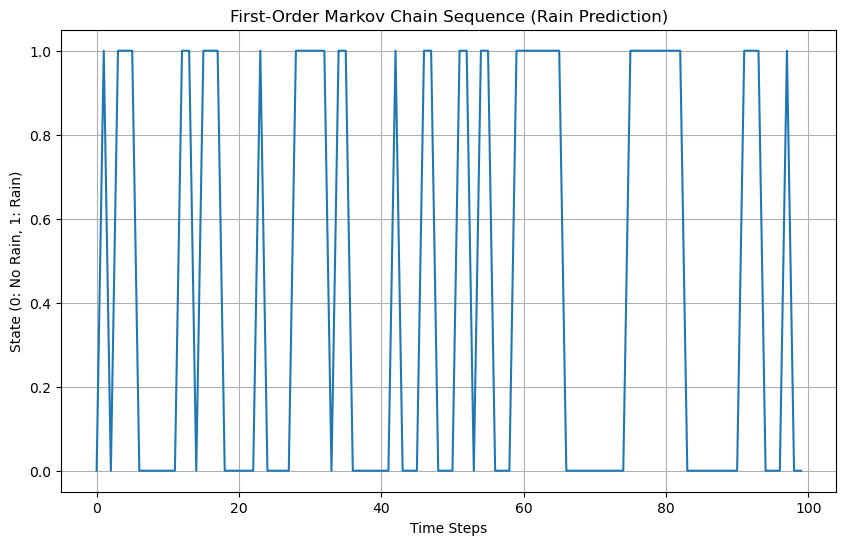

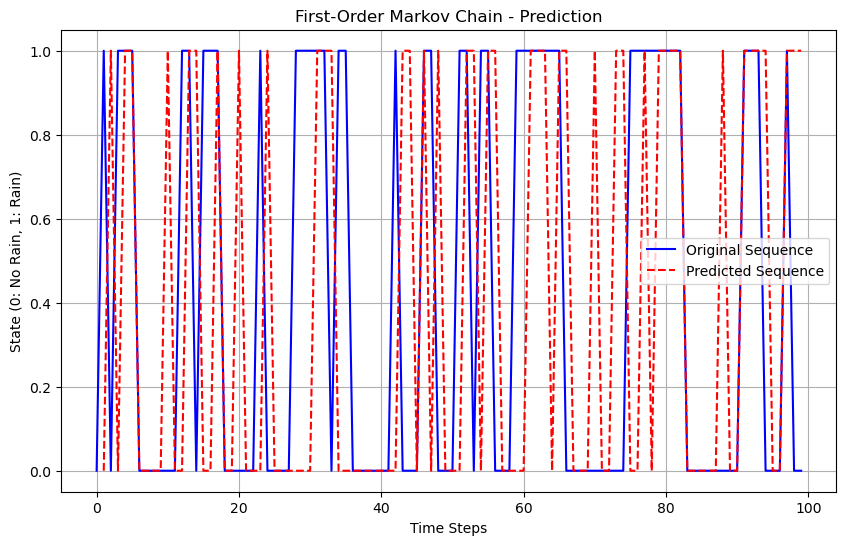

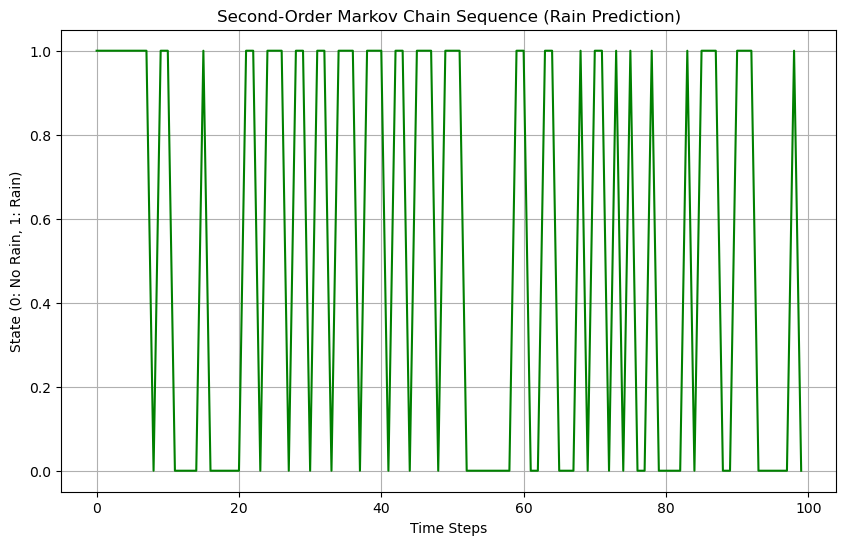

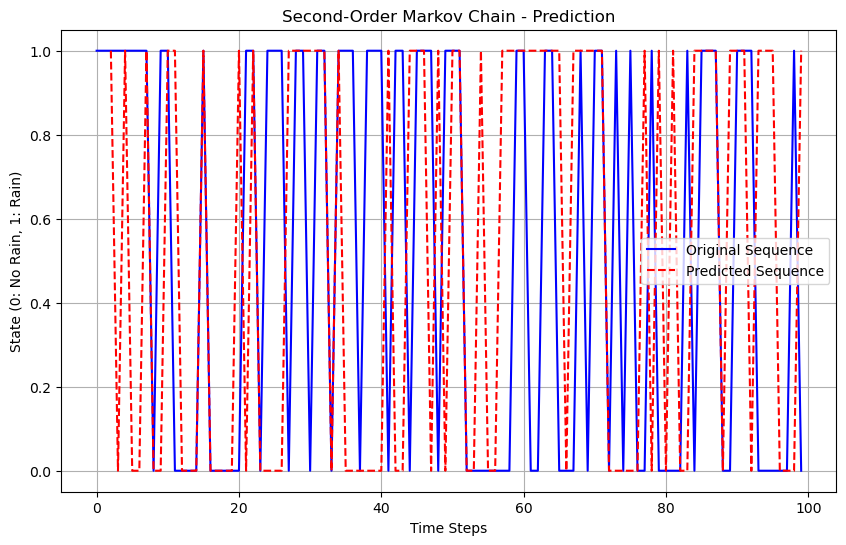

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate sequential binary data (e.g., rain or no rain)
np.random.seed(42)

# Generating a simple sequential binary data sequence with a Markov process
def generate_sequence(n, transition_probabilities):
    sequence = [np.random.choice([0, 1])]  # Start with a random value (0 or 1)
    for _ in range(1, n):
        current_state = sequence[-1]
        next_state = np.random.choice([0, 1], p=transition_probabilities[current_state])
        sequence.append(next_state)
    return np.array(sequence)

# Transition probabilities for first-order Markov chain (probability of state transitions)
# Transition matrix for the Markov chain (state 0 -> state 1, state 1 -> state 0)
transition_probabilities_first_order = np.array([[0.7, 0.3],  # From state 0 to {0, 1}
                                                [0.4, 0.6]]) # From state 1 to {0, 1}

# Generate sequence of length 100 with the first-order Markov chain
sequence_first_order = generate_sequence(100, transition_probabilities_first_order)

# Plot the first-order sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence_first_order, label="First-Order Markov Chain")
plt.title("First-Order Markov Chain Sequence (Rain Prediction)")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.grid(True)
plt.show()

# Function for first-order prediction (only using the last state)
def first_order_predict(sequence):
    predictions = []
    for i in range(1, len(sequence)):
        previous_state = sequence[i-1]
        predicted_state = np.random.choice([0, 1], p=transition_probabilities_first_order[previous_state])
        predictions.append(predicted_state)
    return np.array(predictions)

# Predict the next 99 values (excluding the first one as it's used as starting state)
predictions_first_order = first_order_predict(sequence_first_order)

# Plot the original sequence and the predictions
plt.figure(figsize=(10, 6))
plt.plot(sequence_first_order, label="Original Sequence", color='blue')
plt.plot(np.arange(1, 100), predictions_first_order, label="Predicted Sequence", linestyle='--', color='red')
plt.title("First-Order Markov Chain - Prediction")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.legend()
plt.grid(True)
plt.show()

# Second-order Markov chain prediction
def generate_second_order_sequence(n, transition_probabilities_second_order):
    sequence = [np.random.choice([0, 1]), np.random.choice([0, 1])]  # Start with two random values
    for _ in range(2, n):
        prev_state_1 = sequence[-1]
        prev_state_2 = sequence[-2]
        next_state = np.random.choice([0, 1], p=transition_probabilities_second_order[prev_state_2, prev_state_1])
        sequence.append(next_state)
    return np.array(sequence)

# Transition probabilities for second-order Markov chain (probability of state transitions)
# Transition matrix for second-order Markov chain
transition_probabilities_second_order = np.array([[[0.6, 0.4], [0.3, 0.7]],  # From (0,0) -> {0,1}, (0,1) -> {0,1}
                                                  [[0.4, 0.6], [0.5, 0.5]]]) # From (1,0) -> {0,1}, (1,1) -> {0,1}

# Generate sequence of length 100 with the second-order Markov chain
sequence_second_order = generate_second_order_sequence(100, transition_probabilities_second_order)

# Plot the second-order sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence_second_order, label="Second-Order Markov Chain", color='green')
plt.title("Second-Order Markov Chain Sequence (Rain Prediction)")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.grid(True)
plt.show()

# Function for second-order prediction (using two previous states)
def second_order_predict(sequence):
    predictions = []
    for i in range(2, len(sequence)):
        prev_state_1 = sequence[i-1]
        prev_state_2 = sequence[i-2]
        predicted_state = np.random.choice([0, 1], p=transition_probabilities_second_order[prev_state_2, prev_state_1])
        predictions.append(predicted_state)
    return np.array(predictions)

# Predict the next 98 values (excluding the first two as they're used as starting states)
predictions_second_order = second_order_predict(sequence_second_order)

# Plot the original sequence and the predictions for second-order Markov Chain
plt.figure(figsize=(10, 6))
plt.plot(sequence_second_order, label="Original Sequence", color='blue')
plt.plot(np.arange(2, 100), predictions_second_order, label="Predicted Sequence", linestyle='--', color='red')
plt.title("Second-Order Markov Chain - Prediction")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.legend()
plt.grid(True)
plt.show()


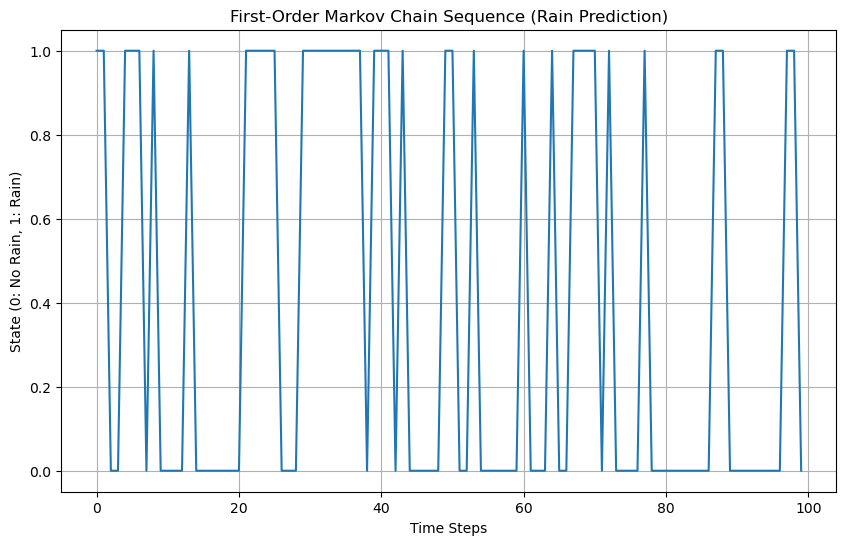

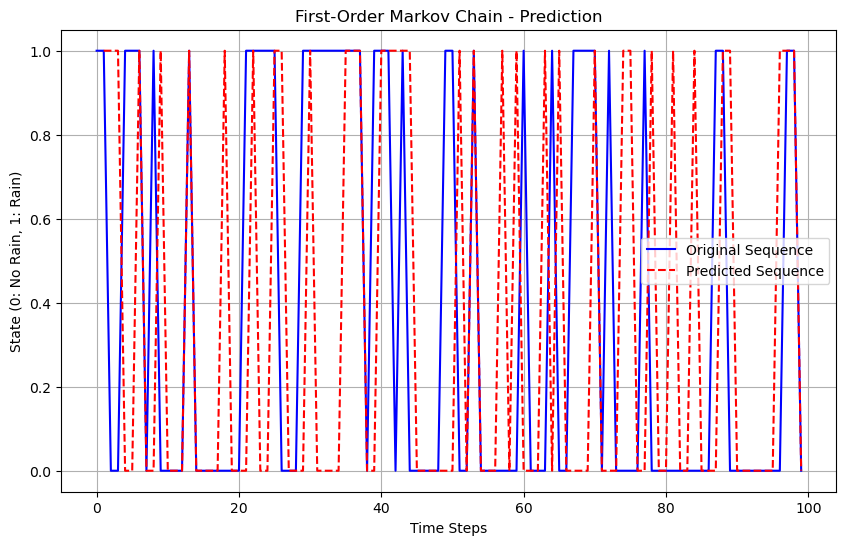

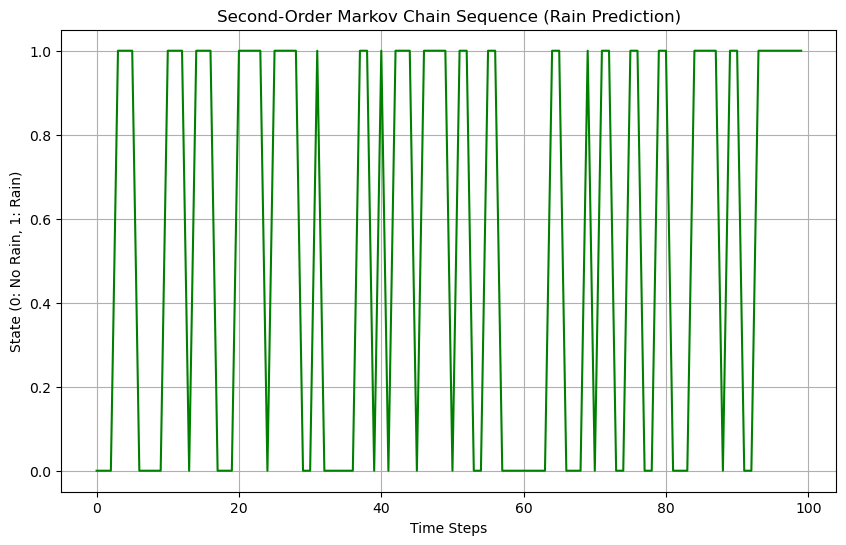

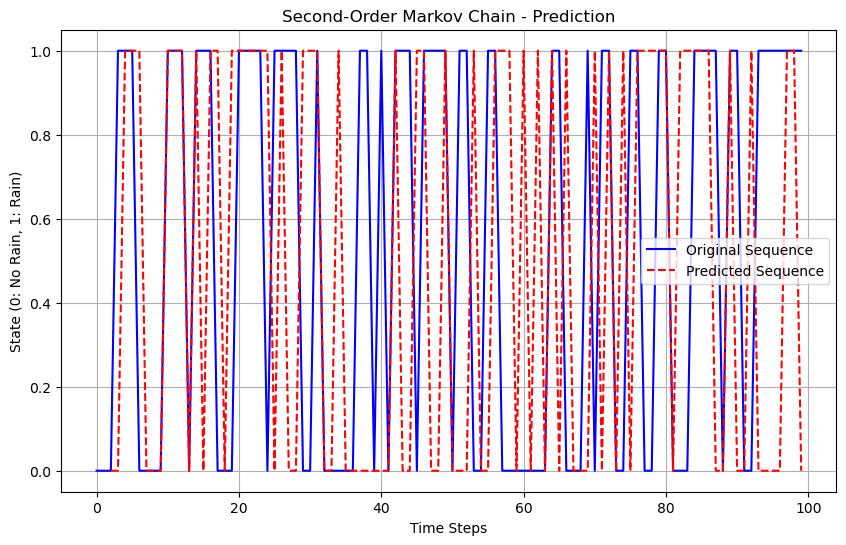

In [4]:
import random
import matplotlib.pyplot as plt

# Simulate sequential binary data (e.g., rain or no rain) for first-order Markov chain
def generate_sequence_first_order(n, transition_probabilities):
    sequence = [random.choice([0, 1])]  # Start with a random value (0 or 1)
    for _ in range(1, n):
        current_state = sequence[-1]
        next_state = random.choices([0, 1], transition_probabilities[current_state])
        sequence.append(next_state[0])
    return sequence

# Transition probabilities for first-order Markov chain (probability of state transitions)
transition_probabilities_first_order = [[0.7, 0.3],  # From state 0 to {0, 1}
                                        [0.4, 0.6]]  # From state 1 to {0, 1}

# Generate sequence of length 100 with the first-order Markov chain
sequence_first_order = generate_sequence_first_order(100, transition_probabilities_first_order)

# Plot the first-order sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence_first_order, label="First-Order Markov Chain")
plt.title("First-Order Markov Chain Sequence (Rain Prediction)")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.grid(True)
plt.show()

# Function for first-order prediction (only using the last state)
def first_order_predict(sequence):
    predictions = []
    for i in range(1, len(sequence)):
        previous_state = sequence[i - 1]
        predicted_state = random.choices([0, 1], transition_probabilities_first_order[previous_state])
        predictions.append(predicted_state[0])
    return predictions

# Predict the next 99 values (excluding the first one as it's used as starting state)
predictions_first_order = first_order_predict(sequence_first_order)

# Plot the original sequence and the predictions
plt.figure(figsize=(10, 6))
plt.plot(sequence_first_order, label="Original Sequence", color='blue')
plt.plot(range(1, 100), predictions_first_order, label="Predicted Sequence", linestyle='--', color='red')
plt.title("First-Order Markov Chain - Prediction")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.legend()
plt.grid(True)
plt.show()

# Second-order Markov chain prediction
def generate_sequence_second_order(n, transition_probabilities):
    sequence = [random.choice([0, 1]), random.choice([0, 1])]  # Start with two random values
    for _ in range(2, n):
        prev_state_1 = sequence[-1]
        prev_state_2 = sequence[-2]
        next_state = random.choices([0, 1], transition_probabilities[prev_state_2][prev_state_1])
        sequence.append(next_state[0])
    return sequence

# Transition probabilities for second-order Markov chain (probability of state transitions)
transition_probabilities_second_order = [[[0.6, 0.4], [0.3, 0.7]],  # From (0,0) -> {0,1}, (0,1) -> {0,1}
                                         [[0.4, 0.6], [0.5, 0.5]]]  # From (1,0) -> {0,1}, (1,1) -> {0,1}

# Generate sequence of length 100 with the second-order Markov chain
sequence_second_order = generate_sequence_second_order(100, transition_probabilities_second_order)

# Plot the second-order sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence_second_order, label="Second-Order Markov Chain", color='green')
plt.title("Second-Order Markov Chain Sequence (Rain Prediction)")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.grid(True)
plt.show()

# Function for second-order prediction (using two previous states)
def second_order_predict(sequence):
    predictions = []
    for i in range(2, len(sequence)):
        prev_state_1 = sequence[i - 1]
        prev_state_2 = sequence[i - 2]
        predicted_state = random.choices([0, 1], transition_probabilities_second_order[prev_state_2][prev_state_1])
        predictions.append(predicted_state[0])
    return predictions

# Predict the next 98 values (excluding the first two as they're used as starting states)
predictions_second_order = second_order_predict(sequence_second_order)

# Plot the original sequence and the predictions for second-order Markov Chain
plt.figure(figsize=(10, 6))
plt.plot(sequence_second_order, label="Original Sequence", color='blue')
plt.plot(range(2, 100), predictions_second_order, label="Predicted Sequence", linestyle='--', color='red')
plt.title("Second-Order Markov Chain - Prediction")
plt.xlabel("Time Steps")
plt.ylabel("State (0: No Rain, 1: Rain)")
plt.legend()
plt.grid(True)
plt.show()


## Markov Chains and State Space Models

### Fig.5: Markov Chain of Latent Variables

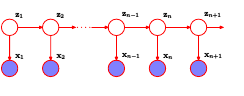

Fig.5 We can represent sequen- tial data using a Markov chain of latent variables, with each observation condi- tioned on the state of the corresponding latent variable. This important graphical structure forms the foundation both for the hidden Markov model and for linear dynamical systems.


We can represent sequential data using a Markov chain of latent variables, where each observation $ x_n $ is conditioned on the state of the corresponding latent variable $ z_n $. This graphical structure forms the foundation for both the Hidden Markov Model (HMM) and for Linear Dynamical Systems (LDS). The graphical structure is shown below:

$$
\begin{array}{cccccc}
x_1 & x_2 & \cdots & x_{n-1} & x_n & x_{n+1} \\
\downarrow & \downarrow & & \downarrow & \downarrow & \downarrow \\
z_1 & z_2 & \cdots & z_{n-1} & z_n & z_{n+1}
\end{array}
$$

Each observation $ x_n $ is influenced by the corresponding latent variable $ z_n $. 

#### Extensions to Higher-Order Markov Chains

We can extend the Markov model to an $ M $-th order Markov chain, where the conditional distribution for a particular variable depends on the previous $ M $ variables:

$$
p(x_n | x_{n-1}, \dots, x_{n-M}) \quad \text{for} \quad M > 1
$$

For such models, the number of parameters increases rapidly, especially for discrete variables. If the observations are discrete, the number of parameters in an \( M \)-th order Markov chain grows exponentially:

$$
\text{Number of Parameters} = K^{M-1}(K - 1)
$$

where $ K $ is the number of possible states for each observation. This exponential growth can make high-order Markov chains impractical for large $ M $.

#### Autoregressive Models and Neural Networks

For continuous variables, an alternative approach involves using **autoregressive (AR) models**, where the conditional distribution $ p(x_n | x_{n-1}, \dots, x_{n-M}) $ is modeled using a linear-Gaussian distribution, where each observation depends linearly on its previous values. This approach is commonly used in time series forecasting.

Additionally, one can use **neural networks** to model the dependencies between observations, known as a **tapped delay line** model. In this approach, the previous $ M $ values of the observed variable are stored (or delayed) and used to predict the next value. This can significantly reduce the number of parameters compared to general high-order Markov models.

#### State Space Models

A more general approach to sequential data is to introduce latent variables that form a Markov chain. This allows us to build more flexible models using simple components. For each observation $ x_n $, we introduce a corresponding latent variable $ z_n $. The structure of the resulting **state space model** is:

$$
p(x_1, \dots, x_N, z_1, \dots, z_N) = p(z_1) \prod_{n=2}^N p(z_n | z_{n-1}) p(x_n | z_n)
$$

This structure assumes that the latent variables form a Markov chain, satisfying the conditional independence property:

$$
z_{n-1}, z_{n+1} \perp z_n | z_n
$$

where $ \perp $ denotes conditional independence. This implies that $ z_n $ can be used to predict future observations, as it forms a bridge between past and future observed variables.

#### Conditional Independence and Prediction

In the state space model, the observed variables $ x_n $ do not exhibit the Markov property at any order. The predictions for future observations depend on all previous observations, not just a fixed number of past values, due to the Markovian dependency of the latent variables $ z_n $.

Thus, the joint distribution for the state space model is given by:

$$
p(x_{n+1} | x_1, \dots, x_n) = \int p(x_{n+1} | z_{n+1}) p(z_{n+1} | x_1, \dots, x_n) dz_{n+1}
$$

The key feature of state space models is that they allow for predictions that depend on all past observations through the latent variables, which is crucial for applications like speech recognition, financial forecasting, and more.

### Hidden Markov Model (HMM)

If the latent variables $ z_n $ are discrete, the model is known as a **Hidden Markov Model (HMM)**. In HMMs, the observations $ x_n $ may be either discrete or continuous, and various conditional distributions can be used to model them. HMMs have applications in a wide range of sequential data problems, such as speech recognition, bioinformatics, and more.

#### Linear Dynamical Systems (LDS)

If both the latent and observed variables are Gaussian, and the conditional distributions are linear-Gaussian, we obtain a **Linear Dynamical System (LDS)**. In LDSs, the transitions between latent states and the relationship between latent states and observations are governed by linear equations with Gaussian noise, making them suitable for continuous time series modeling.


In [7]:
class HiddenMarkovModel:
    def __init__(self, hidden_states, observations, transition_matrix, observation_matrix, start_probs):
        self.hidden_states = hidden_states
        self.observations = observations
        self.transition_matrix = transition_matrix
        self.observation_matrix = observation_matrix
        self.start_probs = start_probs
    
    def next_hidden_state(self, current_state):
        return random.choices(self.hidden_states, self.transition_matrix[current_state])
    
    def generate_observation(self, hidden_state):
        return random.choices(self.observations, self.observation_matrix[hidden_state])
    
    def generate_sequence(self, length):
        hidden_state_sequence = []
        observation_sequence = []
        
        # Start with an initial state based on the start probabilities
        current_hidden_state = random.choices(self.hidden_states, self.start_probs)[0]
        for _ in range(length):
            hidden_state_sequence.append(current_hidden_state)
            observation = self.generate_observation(current_hidden_state)[0]
            observation_sequence.append(observation)
            
            # Get the next hidden state based on the transition matrix
            current_hidden_state = self.next_hidden_state(current_hidden_state)[0]
        
        return hidden_state_sequence, observation_sequence


# Define hidden states, observations, and the necessary matrices
hidden_states = ['Rainy', 'Sunny']
observations = ['Wet', 'Dry']
transition_matrix = {
    'Rainy': [0.7, 0.3],
    'Sunny': [0.4, 0.6]
}
observation_matrix = {
    'Rainy': [0.9, 0.1],  # 90% chance of 'Wet' when it's 'Rainy'
    'Sunny': [0.2, 0.8]   # 80% chance of 'Dry' when it's 'Sunny'
}
start_probs = [0.6, 0.4]  # 60% chance to start in 'Rainy'

# Initialize the HMM
hmm = HiddenMarkovModel(hidden_states, observations, transition_matrix, observation_matrix, start_probs)

# Generate a sequence of observations (and their hidden states)
hidden_sequence, observation_sequence = hmm.generate_sequence(10)

print("Generated Hidden States:", hidden_sequence)
print("Generated Observations:", observation_sequence)


Generated Hidden States: ['Rainy', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny']
Generated Observations: ['Wet', 'Wet', 'Dry', 'Wet', 'Dry', 'Dry', 'Wet', 'Dry', 'Dry', 'Wet']


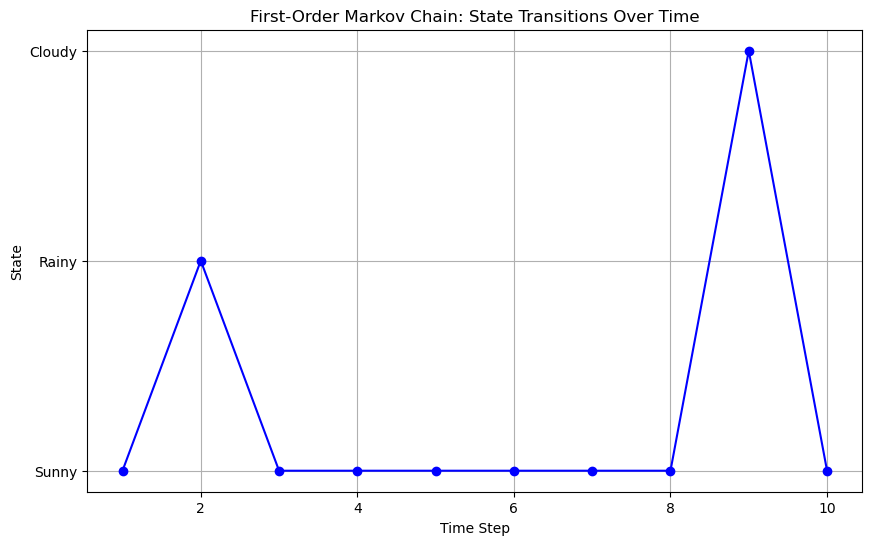

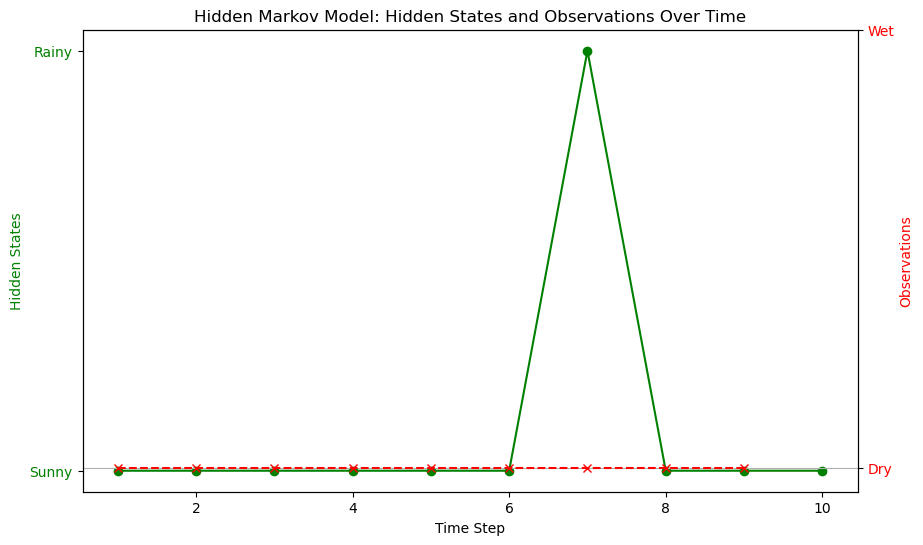

In [9]:
import random

class FirstOrderMarkovChain:
    def __init__(self, transition_matrix):
        self.transition_matrix = transition_matrix
    
    def generate_sequence(self, initial_state, num_steps):
        sequence = [initial_state]
        current_state = initial_state
        
        for _ in range(num_steps - 1):
            next_state = random.choices(
                population=list(self.transition_matrix[current_state].keys()),
                weights=list(self.transition_matrix[current_state].values())
            )[0]
            sequence.append(next_state)
            current_state = next_state
        return sequence

# Define the transition matrix for the weather Markov Chain
weather_transition_matrix = {
    'Sunny': {'Sunny': 0.7, 'Cloudy': 0.2, 'Rainy': 0.1},
    'Cloudy': {'Sunny': 0.3, 'Cloudy': 0.4, 'Rainy': 0.3},
    'Rainy': {'Sunny': 0.2, 'Cloudy': 0.5, 'Rainy': 0.3}
}

# Create the First-Order Markov Chain object
markov_chain = FirstOrderMarkovChain(weather_transition_matrix)


class HiddenMarkovModel:
    def __init__(self, states, observations, start_prob, transition_prob, emission_prob):
        self.states = states
        self.observations = observations
        self.start_prob = start_prob
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob
    
    def generate_sequence(self, num_steps):
        hidden_sequence = []
        observation_sequence = []
        
        # Initialize with the first state
        current_state = random.choices(self.states, self.start_prob)[0]
        hidden_sequence.append(current_state)
        
        # Generate the sequence
        for _ in range(num_steps - 1):
            next_state = random.choices(self.states, self.transition_prob[current_state])[0]
            hidden_sequence.append(next_state)
            
            # Generate observation based on the hidden state
            observation = random.choices(self.observations, self.emission_prob[next_state])[0]
            observation_sequence.append(observation)
            
            current_state = next_state
        
        return hidden_sequence, observation_sequence

# Define the HMM parameters
states = ['Sunny', 'Rainy']
observations = ['Dry', 'Wet']
start_prob = [0.6, 0.4]  # Initial probability of states
transition_prob = {
    'Sunny': [0.7, 0.3],  # Probabilities of transitioning from Sunny to [Sunny, Rainy]
    'Rainy': [0.4, 0.6]   # Probabilities of transitioning from Rainy to [Sunny, Rainy]
}
emission_prob = {
    'Sunny': [0.8, 0.2],  # Probabilities of observing [Dry, Wet] when state is Sunny
    'Rainy': [0.3, 0.7]   # Probabilities of observing [Dry, Wet] when state is Rainy
}

# Create the Hidden Markov Model object
hmm = HiddenMarkovModel(states, observations, start_prob, transition_prob, emission_prob)


import matplotlib.pyplot as plt

# Generate a sequence of weather states using the First-Order Markov Chain
markov_sequence = markov_chain.generate_sequence('Sunny', 10)

# Plot the Markov Chain State Transitions
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(markov_sequence) + 1), markov_sequence, marker='o', linestyle='-', color='b')
plt.title('First-Order Markov Chain: State Transitions Over Time')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.yticks(['Rainy', 'Sunny', 'Cloudy'])  # The different states
plt.grid(True)
plt.show()

# Generate a sequence using the Hidden Markov Model
hidden_sequence, observation_sequence = hmm.generate_sequence(10)

# Plot the Hidden Markov Model Sequences
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Hidden States
ax1.plot(range(1, len(hidden_sequence) + 1), hidden_sequence, marker='o', linestyle='-', color='g', label='Hidden States')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Hidden States', color='g')
ax1.set_yticks(['Rainy', 'Sunny'])  # The hidden states
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis for Observations
ax2 = ax1.twinx()
ax2.plot(range(1, len(observation_sequence) + 1), observation_sequence, marker='x', linestyle='--', color='r', label='Observations')
ax2.set_ylabel('Observations', color='r')
ax2.set_yticks(['Wet', 'Dry'])  # The observable states
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Hidden Markov Model: Hidden States and Observations Over Time')
plt.grid(True)
plt.show()


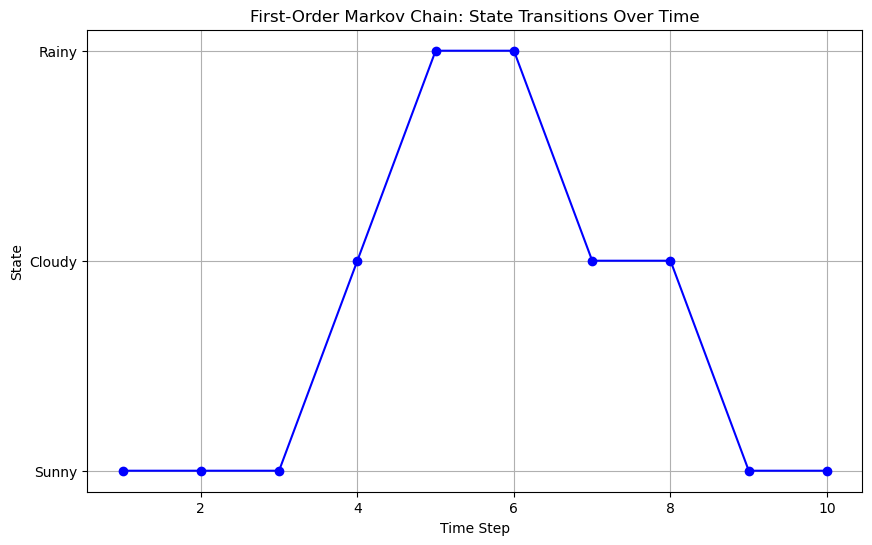

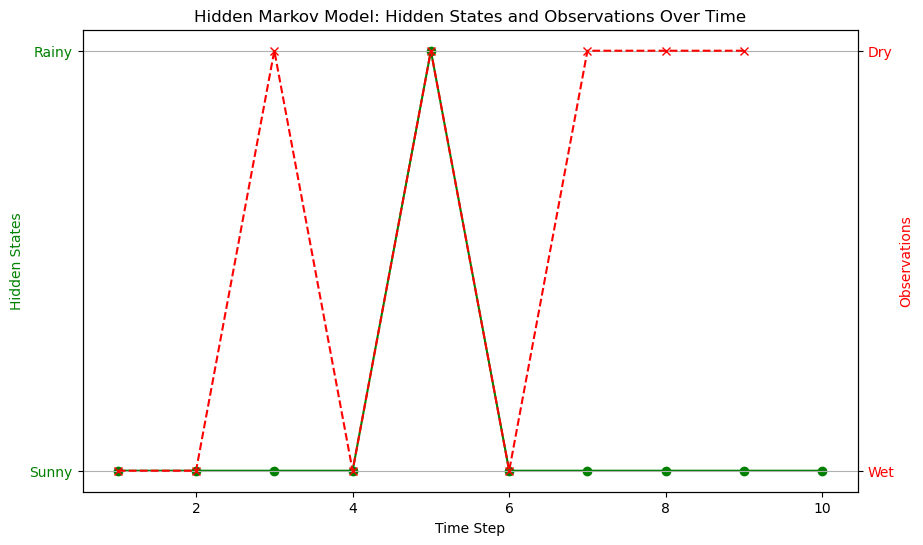

In [10]:
import matplotlib.pyplot as plt

# Generate a sequence of weather states starting from 'Sunny' using First-Order Markov Chain
sequence = markov_chain.generate_sequence('Sunny', 10)

# Plot the sequence of states
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sequence) + 1), sequence, marker='o', linestyle='-', color='b')
plt.title('First-Order Markov Chain: State Transitions Over Time')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.yticks(['Rainy', 'Sunny', 'Cloudy'])  # The different states
plt.grid(True)
plt.show()
# Generate a sequence of observations and hidden states using Hidden Markov Model
hidden_sequence, observation_sequence = hmm.generate_sequence(10)

# Plotting the Hidden States and Observations

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Hidden States
ax1.plot(range(1, len(hidden_sequence) + 1), hidden_sequence, marker='o', linestyle='-', color='g', label='Hidden States')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Hidden States', color='g')
ax1.set_yticks(['Rainy', 'Sunny'])  # The hidden states
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis for Observations
ax2 = ax1.twinx()
ax2.plot(range(1, len(observation_sequence) + 1), observation_sequence, marker='x', linestyle='--', color='r', label='Observations')
ax2.set_ylabel('Observations', color='r')
ax2.set_yticks(['Wet', 'Dry'])  # The observable states
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Hidden Markov Model: Hidden States and Observations Over Time')
plt.grid(True)
plt.show()
